# Did the Jupyter Juggernauts Cheat?
<img src="data/scoundrels_dicing.jpg" alt=""/>

In [10]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dice_rolls = Table().read_table("data/Roll_Results_Spring_2025.csv")
dice_rolls.show(3)

Data Detectives,Statistical Sorcerers,Algorithm Avengers,Jupyter Juggernauts,Outlier Outlaws
4,8,10,11,12
9,3,9,7,9
5,10,6,7,6


In [6]:
dice_rolls.labels

('Data Detectives',
 'Statistical Sorcerers',
 'Algorithm Avengers',
 'Jupyter Juggernauts',
 'Outlier Outlaws')

In [7]:
for label in dice_rolls.labels:
    average = np.mean(dice_rolls.column(label))
    print(f"The {label} had an average roll of {average}")

The Data Detectives had an average roll of 7.14
The Statistical Sorcerers had an average roll of 6.76
The Algorithm Avengers had an average roll of 7.24
The Jupyter Juggernauts had an average roll of 8.88
The Outlier Outlaws had an average roll of 7.68


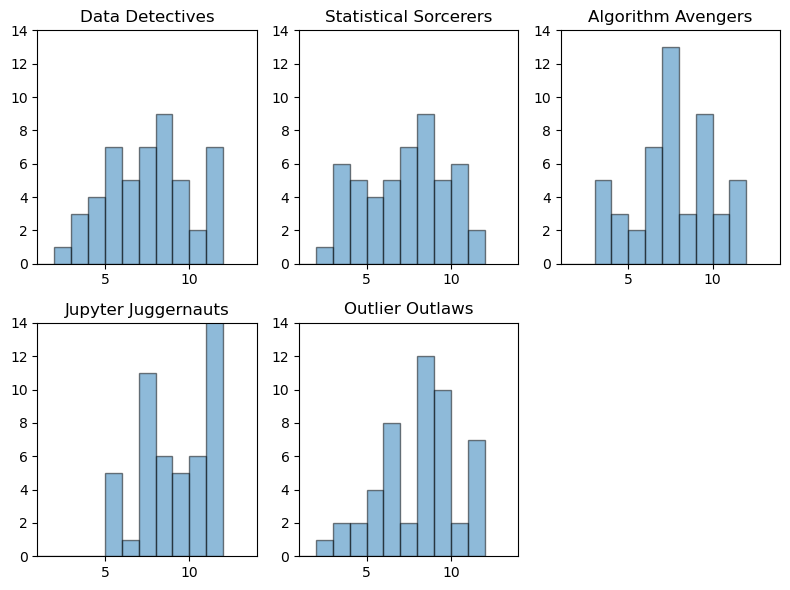

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

# Define the teams
teams = [
    "Data Detectives",
    "Statistical Sorcerers",
    "Algorithm Avengers",
    "Jupyter Juggernauts",
    "Outlier Outlaws"
]
bins = range(1, 13)
# Set common limits
xmin, xmax = 1, 14  # Adjust based on your dice roll range
ymin, ymax = 0, 14  # Adjust based on expected frequencies

# Plot histograms
for ax, team in zip(axes.flat, teams):
    ax.hist(dice_rolls.column(team), alpha=0.5, bins=bins, edgecolor="black")
    ax.set_title(team)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Make the last subplot blank
axes[1,2].axis("off")

plt.tight_layout()
plt.show()

## Expected mean total is 7
The test statistics is the difference between the sample mean and the theortical mean.

In [42]:
expected_value = 7
test_statistic = np.mean(dice_roll.column("Jupyter Juggernauts")) - expected_value
test_statistic

1.8800000000000008

### Null Hypothesis
#### Jupyter Juggernauts did not cheat. They got a higher average purely by chance.

### Alternative Hypothesis
#### Jupyter Juggernauts were could not have done so well by chance.

## Simulating rolling dice 50 times

In [50]:
np.arange(1, 7)

array([1, 2, 3, 4, 5, 6])

In [51]:
np.random.choice(np.arange(1, 7))

4

In [52]:
np.random.choice(np.arange(1, 7), 50)

array([2, 5, 6, 6, 6, 6, 5, 5, 2, 5, 2, 6, 4, 4, 3, 6, 4, 5, 4, 2, 6, 6, 1,
       6, 4, 4, 6, 3, 5, 6, 4, 6, 3, 1, 3, 1, 5, 2, 2, 5, 5, 3, 5, 2, 2, 2,
       2, 4, 5, 3])

In [53]:
sim_result = np.random.choice(np.arange(1, 7), 50) + np.random.choice(np.arange(1, 7), 50)
sim_result

array([ 7,  6,  4,  7,  4,  5,  8,  6,  3,  4,  7,  4,  7,  6,  7,  6,  7,
        3, 12,  6, 10,  4,  7,  9,  8, 10, 10,  7,  6, 10,  7, 10,  7,  8,
        6,  7,  6,  9,  3,  5,  4,  7,  6,  2, 11,  8,  8,  9,  7,  5])

## Conduct out simulation ten thousand times

In [65]:
num_sim = 10_000
results = []
for i in np.arange(num_sim):
    sim_result = np.random.choice(np.arange(1, 7), 50) + np.random.choice(np.arange(1, 7), 50)
    sim_mean = np.average(sim_result)
    results.append(sim_mean - 7)

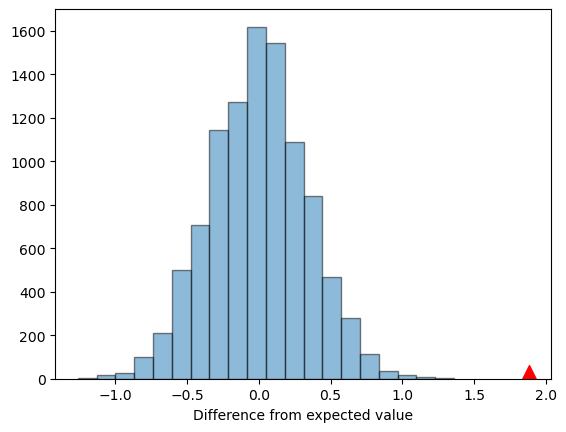

In [73]:
plt.hist(results, bins=20, alpha=0.5, edgecolor="black")
plt.scatter(test_statistic, 0, marker="^", s=400, color="red")
plt.xlabel("Difference from expected value");

## p-value
The p-value is the simple the probability of getting a result greater than or equal to the test statisic by chance.

In [77]:
results = make_array(results)
np.sum(results > test_statistic) / num_sim

0.0

What did we just do to calculate the p-value?

In [78]:
x = make_array(1, 4, 8, 2, 5)
x > 4

array([False, False,  True, False,  True], dtype=bool)

In [80]:
# True is 1, False is 0, so...
np.sum(x > 4)

2